In [16]:
# import sys
# sys.path.append("/Users/admin/Desktop/diploma")

import os
import pandas as pd
import numpy as np
import seaborn as sns
from copy import copy
from tqdm import tqdm
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt

from sklearn.utils.validation import check_X_y, check_is_fitted, check_array
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, RegressorMixin
from runc import *
from ensembles import GradientBoostingMSE
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from scipy.optimize import minimize
import numpy.ma as mask
from sklearn.dummy import DummyRegressor
from models import BoostingElementaryPredicates, BoostingElementaryPredicates1, BoostingElementaryPredicatesv2

## Baseline

In [17]:
# Генерация случайных данных для регрессии
X, y = make_regression(n_samples=100, n_features=10, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = BoostingElementaryPredicates(50, 50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2)

Mean Squared Error: 12849.651466881765
R2_score: -0.010889748743525551


In [25]:
model = BoostingElementaryPredicatesv2(54, 10, max_cov=20)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2)

Mean Squared Error: 3.260029575864291e+29
R2_score: -2.5646847210881153e+25


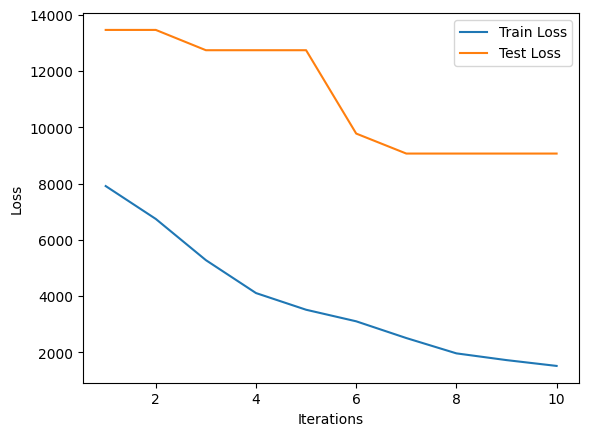

BoostingElementaryPredicates1(m=27, num_iter=10)

In [12]:
model = BoostingElementaryPredicates1(10, 27)
model.fit_predict(X_train, y_train, X_test, y_test)
# y_pred = model.predict(X_test)

In [ ]:
# # Генерация случайных данных для регрессии
# X, y = make_regression(n_samples=100, n_features=20, n_informative=10, random_state=42)

# # Инициализация класса KBinsDiscretizer
# encoder = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

# # Применение KBinsDiscretizer к данным X
# X_encoded = encoder.fit_transform(X)

# X_encoded = X_encoded.astype('int64')

# # Разделение данных на обучающий и тестовый наборы
# X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [10]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [11]:
param_grid = {
    "num_iter" : np.linspace(10, 50, 10).astype(int),
    "m" : np.linspace(5, 50, 15).astype(int)
}

model_to_tune = BoostingElementaryPredicates(num_iter=10, m=5)

grid_search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid, scoring=rmse_scorer, cv=3, n_jobs=-1)
# grid_search = GridSearchCV(estimator=model_to_tune, param_grid=param_grid, scoring=r2_score, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшее значение RMSE:", np.abs(grid_search.best_score_))

Лучшие параметры: {'m': 27, 'num_iter': 10}
Лучшее значение RMSE: 259.8331613264076


In [3]:
# Создание и обучение модели BoostingRegressor
# model = GradientBoostingRegressor()
# cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1, error_score='raise')

# print('RMSE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

model = BoostingElementaryPredicatesv2(54, 10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2)

model = GradientBoostingRegressor()
model.fit(X, y)
y_pred = model.predict(X_test)
# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R2_score:", r2)

# Сравнение с простой моделью Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)
print("R2_score (Linear Regression):", r2_linear)

Mean Squared Error: 3.260029575864291e+29
R2_score: -2.5646847210881153e+25
Mean Squared Error: 2.542577719895618
R2_score: 0.9997999738935293
Mean Squared Error (Linear Regression): 3.7726483931289666e-27
R2_score (Linear Regression): 1.0


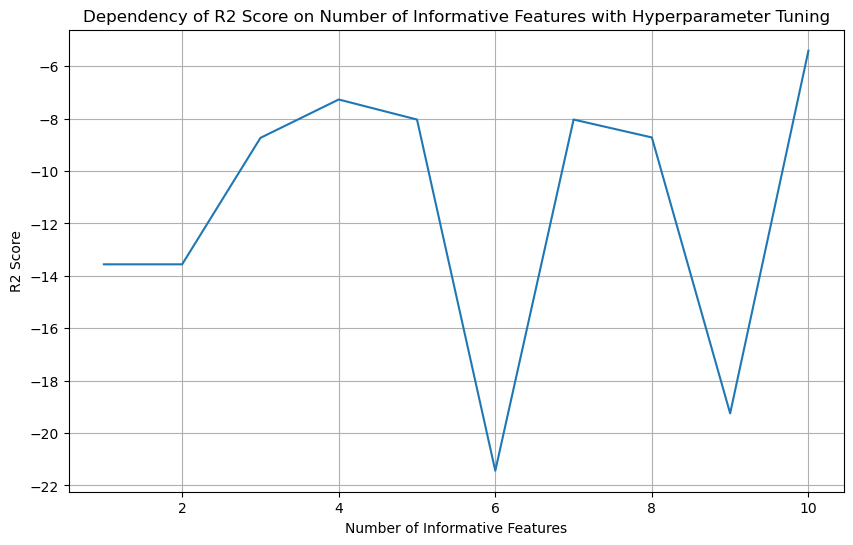

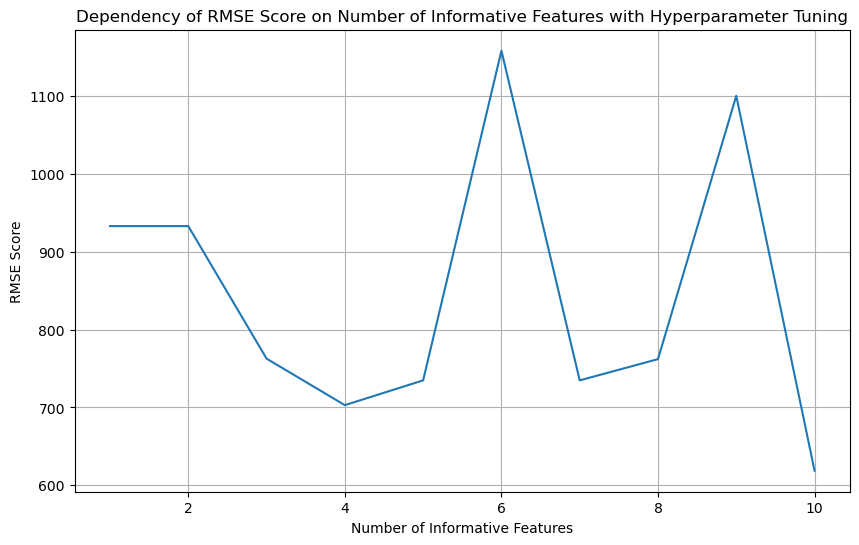

In [8]:
informative_features = np.arange(1, 11)  

param_grid = {
    "num_iter" : np.linspace(10, 50, 10).astype(int),
    "m" : np.linspace(5, 50, 15).astype(int)
}

model = BoostingElementaryPredicates(10, 5)

scorer = make_scorer(r2_score)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scorer)

# Now perform grid search for each number of informative features
best_params = []
for n_informative in informative_features:
    X, y = make_regression(n_samples=100, n_features=10, n_informative=n_informative, noise=0.1, random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    grid_search.fit(X_train, y_train)
    best_params.append(grid_search.best_params_)

# Now, use the best hyperparameters to train the BoostingElementaryPredicates model and evaluate performance
r2_scores_hyperparam = np.zeros(len(informative_features))
rmse_scores_hyperparam = np.zeros(len(informative_features))

for i, n_informative in enumerate(informative_features):
    best_param = best_params[i]
    model = BoostingElementaryPredicates(num_iter=best_param['num_iter'], m=best_param['m'])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores_hyperparam[i] = r2_score(y_test, y_pred)
    rmse_scores_hyperparam[i] = np.sqrt(mean_squared_error(y_test, y_pred))

# Plot the results with hyperparameter tuning
plt.figure(figsize=(10, 6))
plt.plot(informative_features, r2_scores_hyperparam)
plt.xlabel('Number of Informative Features')
plt.ylabel('R2 Score')
plt.title('Dependency of R2 Score on Number of Informative Features with Hyperparameter Tuning')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(informative_features, rmse_scores_hyperparam)
plt.xlabel('Number of Informative Features')
plt.ylabel('RMSE Score')
plt.title('Dependency of RMSE Score on Number of Informative Features with Hyperparameter Tuning')
plt.grid(True)
plt.show()

### Auto-MPG

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [3]:
dataset = raw_dataset.copy()
dataset.tail()

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1

# Предобработка

In [4]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
dataset = dataset.dropna()

In [6]:
dataset = dataset.astype('float64')
dataset

MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0        4.0         140.0        86.0  2790.0          15.6   
394  44.0        4.0          97.0        52.0  2130.0          24.6   
395  32.0        4.0         135.0        84.0  2295.0          11.6   
396  28.0        4.0         120.0        79.0  2625.0          18.6   
397  31.0        4.0         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0          70.0     1.0  
1          70.0     1.0  
2          70.0     1.0  
3          70.0     1.0  
4          70.0     1.0  
..          ...     ...  
393        82.0     1.0  
394        82.0     2.0  
395        82.0     1.0  
396        82.0     1.0  
397        82.0     1.0  

[392 rows x 8 columns]

In [7]:
y = dataset['MPG'].to_numpy()
X = dataset.drop(columns='MPG').to_numpy()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("R2_score (Linear Regression):", r2_linear)
print("Mean Squared Error (Linear Regression):", mse_linear)

R2_score (Linear Regression): 0.7901500386760351
Mean Squared Error (Linear Regression): 10.710864418838367


In [11]:
base_value = y_hat = y_train.mean()
n = X_train.shape[1]


# for _ in range(16):
residuals = y_train - y_hat
max_residual_idx = np.argmax(np.abs(residuals))

runc = RuncDualizer()  # create new Dualizer
           
sorted_residual_indices = np.argsort(np.abs(residuals))
min_m_residual_indices = sorted_residual_indices[:60]
key_object = X_train[max_residual_idx]
comp_rows = []
for idx in min_m_residual_indices:
    comp_row = []
    for j in range(n):
        if X_train[idx, j] < key_object[j]:
            comp_row.append(j)  # Меньше
        elif X_train[idx, j] > key_object[j]:
            comp_row.append(j+n)  # Больше
    comp_rows.append(comp_row)
    if len(comp_row) > 0:
        runc.add_input_row(comp_row)

In [9]:
model = BoostingElementaryPredicatesv2(num_iter=30, m=50)
model.fit(X_train, y_train)
print(mean_squared_error(y_test, model.predict(X_test)))
print(r2_score(y_test, model.predict(X_test)))

BoostingElementaryPredicatesv2(m=50, num_iter=30)

16


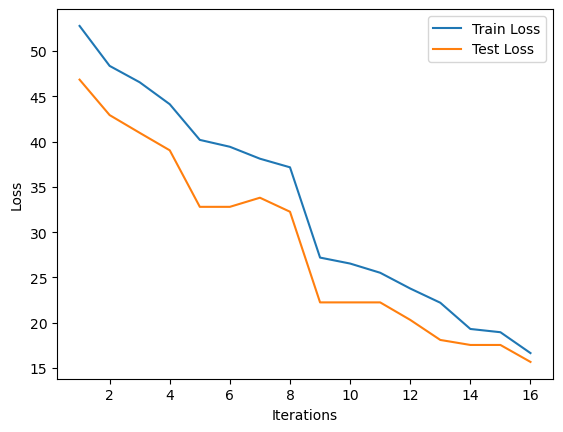

BoostingElementaryPredicates1(m=50, num_iter=16)

In [18]:
model = BoostingElementaryPredicates1(num_iter=16, m=50)
model.fit_predict(X_train, y_train, X_test, y_test)


In [15]:
print(mean_squared_error(y_test, model.predict(X_test)))
print(r2_score(y_test, model.predict(X_test)))

7.162670390879511e+30
-1.4033284763260865e+29
